In [2]:
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from azure.cognitiveservices.vision.computervision.models import OperationStatusCodes
from azure.cognitiveservices.vision.computervision.models import VisualFeatureTypes
from azure.ai.vision.imageanalysis.models import VisualFeatures

from msrest.authentication import CognitiveServicesCredentials
from array import array
import os
from PIL import Image
import sys
import time
import matplotlib.pyplot as plt
from skimage import io
import numpy as np

In [3]:
def setup():
    '''
    Authenticate
    Authenticates your credentials and creates a client.
    '''
    
    os.environ["VISION_ENDPOINT"] = "https://ailab4a.cognitiveservices.azure.com/" 
    #-> setx VISION_KEY your-key
    
    os.environ["VISION_KEY"] = "ae6fa7e20fec44ed8217bf1bb4b4cae0" 
    #-> setx VISION_ENDPOINT your-endpoint
    
    subscription_key = os.environ["VISION_KEY"]
    endpoint = os.environ["VISION_ENDPOINT"]
    computervision_client = ComputerVisionClient(endpoint, CognitiveServicesCredentials(subscription_key))
    return computervision_client
    '''
    END - Authenticate
    '''

In [9]:
# Pentru imaginile care contin biciclete:
# a. sa se localizeze automat bicicletele in aceste imagini si sa se evidentieze chenarele care incadreaza bicicletele

Analizând imaginea: D:/FACULTATE/SEM4/AI/Lab4/bike_2\bike02.jpg
Bicicletă găsită în imagine. [9, 90, 366, 321]


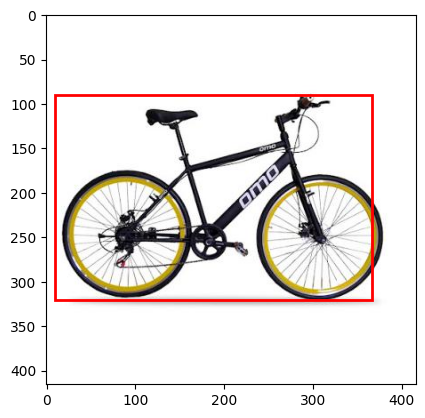

Analizând imaginea: D:/FACULTATE/SEM4/AI/Lab4/bike_2\bike03.jpg
Bicicletă găsită în imagine. [155, 153, 338, 405]


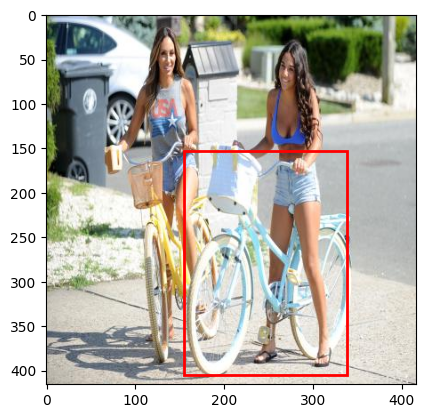

Analizând imaginea: D:/FACULTATE/SEM4/AI/Lab4/bike_2\bike04.jpg
Bicicletă găsită în imagine. [0, 2, 414, 412]


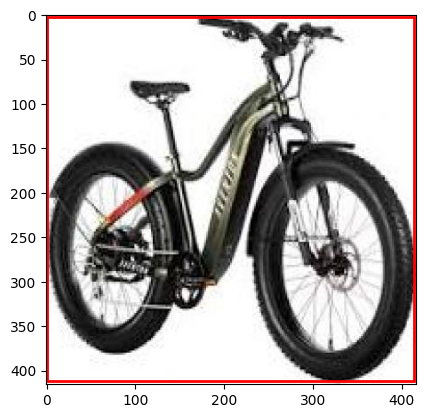

Analizând imaginea: D:/FACULTATE/SEM4/AI/Lab4/bike_2\bike05.jpg
Bicicletă găsită în imagine. [66, 36, 349, 335]


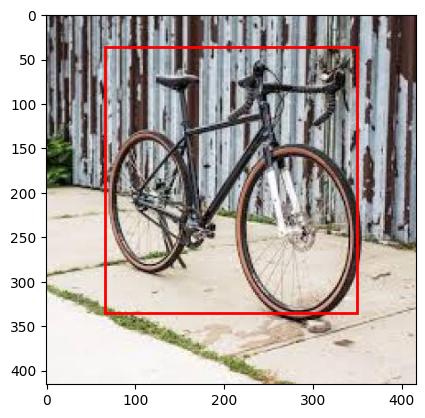

Analizând imaginea: D:/FACULTATE/SEM4/AI/Lab4/bike_2\bike06.jpg
Nu s-a găsit bicicletă în imagine.


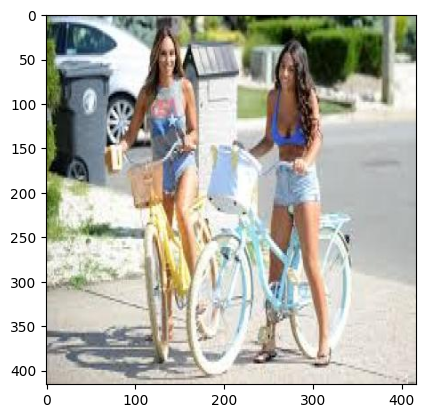

Analizând imaginea: D:/FACULTATE/SEM4/AI/Lab4/bike_2\bike07.jpg
Bicicletă găsită în imagine. [51, 206, 308, 416]


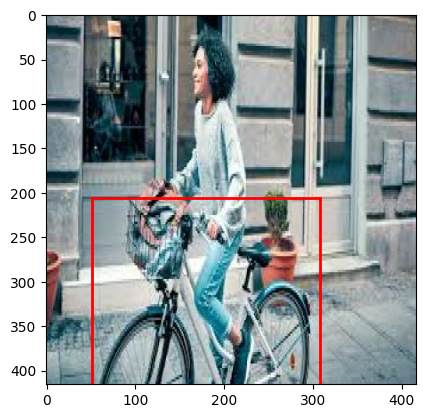

Analizând imaginea: D:/FACULTATE/SEM4/AI/Lab4/bike_2\bike08.jpg
Nu s-a găsit bicicletă în imagine.


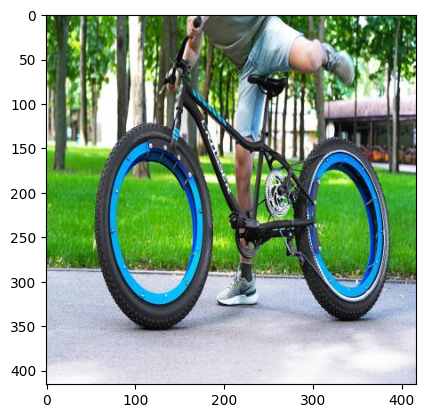

Analizând imaginea: D:/FACULTATE/SEM4/AI/Lab4/bike_2\bike09.jpg
Bicicletă găsită în imagine. [4, 14, 371, 402]


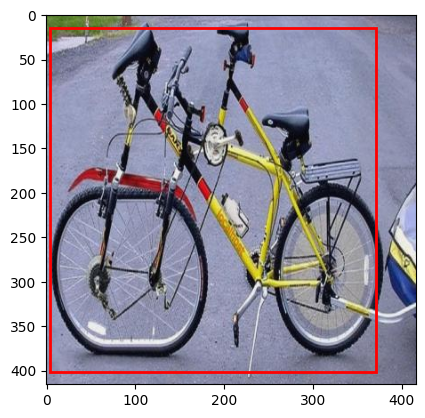

Analizând imaginea: D:/FACULTATE/SEM4/AI/Lab4/bike_2\bike1.jpg
Bicicletă găsită în imagine. [3, 16, 412, 410]


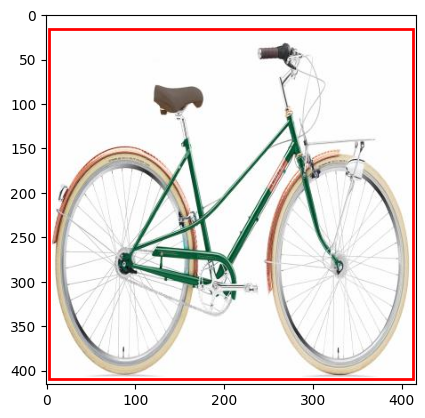

Analizând imaginea: D:/FACULTATE/SEM4/AI/Lab4/bike_2\bike10.jpg
Bicicletă găsită în imagine. [138, 135, 391, 404]


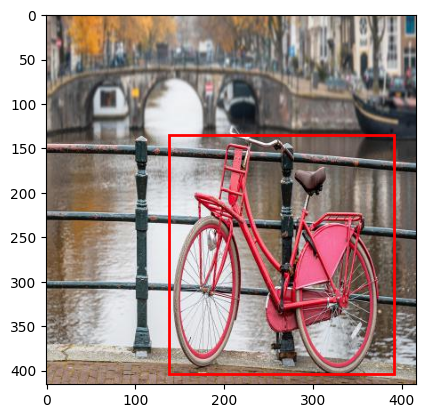

Analizând imaginea: D:/FACULTATE/SEM4/AI/Lab4/bike_2\binClass.png
Bicicletă găsită în imagine. [107, 899, 344, 1034]


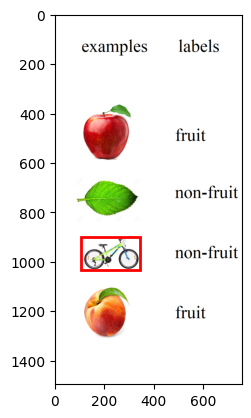

In [59]:
import cv2
import os
import matplotlib.pyplot as plt

computervision_client = setup()

director_imagini = "D:/FACULTATE/SEM4/AI/Lab4/bike_2"
imagini = []
predicted_coords = []
ground_truth = []
    
for nume_fisier in os.listdir(director_imagini):
    cale_fisier = os.path.join(director_imagini, nume_fisier)
        
    # Verificăm dacă fișierul este o imagine
    if os.path.isfile(cale_fisier) and any(cale_fisier.endswith(extensie) for extensie in [".jpg", ".jpeg", ".png"]):
        # Adăugăm calea către imagine în listă
        imagini.append(cale_fisier)

for imagine_path in imagini:
    img = open(imagine_path, "rb")
    result = computervision_client.analyze_image_in_stream(img, visual_features=[VisualFeatureTypes.objects])
        
    print(f"Analizând imaginea: {imagine_path}")
    found_bicycle = False
        
    for ob in result.objects:
        if ob.object_property == "bicycle":
            predicted_bicycle_bb = [ob.rectangle.x, ob.rectangle.y, ob.rectangle.x + ob.rectangle.w, ob.rectangle.y + ob.rectangle.h]
            found_bicycle = True
            break
       
    if found_bicycle:
        print("Bicicletă găsită în imagine.", predicted_bicycle_bb)
      
        im = plt.imread(imagine_path)
        fig = plt.imshow(im)
        fig.axes.add_patch(plt.Rectangle(xy = (predicted_bicycle_bb[0], predicted_bicycle_bb[1]), width = predicted_bicycle_bb[2]-predicted_bicycle_bb[0], height = predicted_bicycle_bb[3]-predicted_bicycle_bb[1], fill = False, color = "red", linewidth = 2))
        plt.show()
 
    else:
        print("Nu s-a găsit bicicletă în imagine.")
    
        im = plt.imread(imagine_path)
        fig = plt.imshow(im)
        plt.show()

In [10]:
# b. sa se eticheteze (fara ajutorul algoritmilor de AI) aceste imagini cu chenare 
# care sa incadreze cat mai exact bicicletele. Care task dureaza mai mult (cel de la punctul a sau 
# c. sa se determine performanta algoritmului de la punctul a avand in vedere etichetarile 
# realizate la punctul b (se vor folosi cel putin 2 metrici).
# cel de la punctul b)?
# raspuns: cel de la punctul b

Analizand imaginea:  D:/FACULTATE/SEM4/AI/Lab4/bike_2/bike02.jpg
Ground truth:  [17, 87, 379, 322]
Predictie:  [9, 90, 366, 321]
Error MAE:  6.25
Error aria:  0.24102400758524137


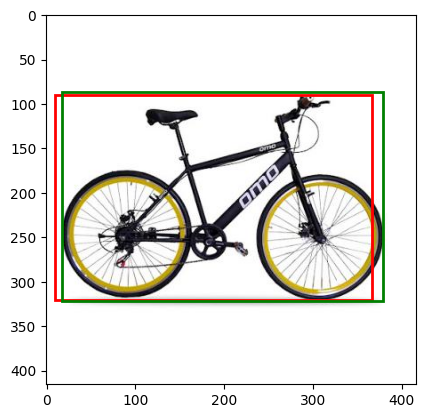




Analizand imaginea:  D:/FACULTATE/SEM4/AI/Lab4/bike_2/bike04.jpg
Ground truth:  [2, 0, 414, 415]
Predictie:  [0, 2, 414, 412]
Error MAE:  1.75
Error aria:  0.16719707584108964


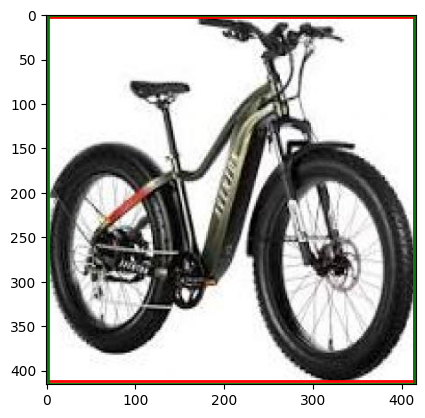




Analizand imaginea:  D:/FACULTATE/SEM4/AI/Lab4/bike_2/bike05.jpg
Ground truth:  [69, 53, 355, 345]
Predictie:  [66, 36, 349, 335]
Error MAE:  9.0
Error aria:  0.26438449910884165


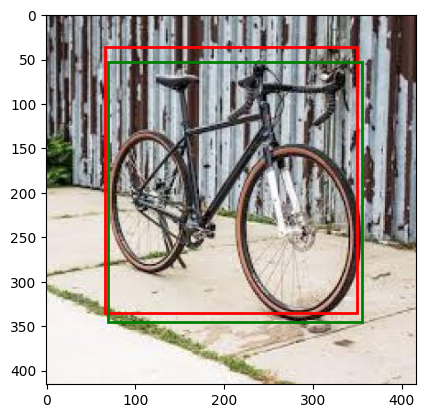




Analizand imaginea:  D:/FACULTATE/SEM4/AI/Lab4/bike_2/bike07.jpg
Ground truth:  [55, 183, 296, 416]
Predictie:  [51, 206, 308, 416]
Error MAE:  9.75
Error aria:  0.37958984252659006


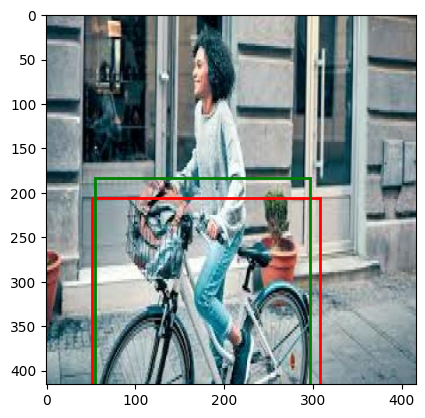




Analizand imaginea:  D:/FACULTATE/SEM4/AI/Lab4/bike_2/bike08.jpg
Ground truth:  [53, 2, 388, 356]
Predictie:  [0, 0, 0, 0]
Error MAE:  199.75


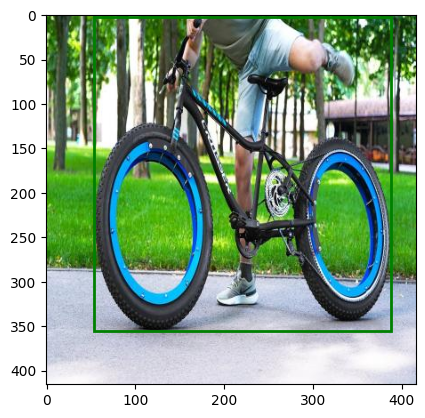




Analizand imaginea:  D:/FACULTATE/SEM4/AI/Lab4/bike_2/bike09.jpg
Ground truth:  [5, 9, 380, 386]
Predictie:  [4, 14, 371, 402]
Error MAE:  7.75
Error aria:  0.20198148132460206


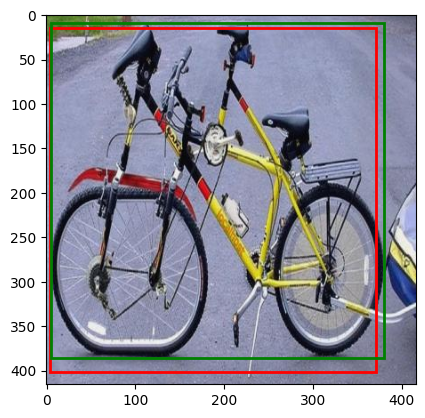




Analizand imaginea:  D:/FACULTATE/SEM4/AI/Lab4/bike_2/bike1.jpg
Ground truth:  [7, 32, 410, 407]
Predictie:  [3, 16, 412, 410]
Error MAE:  6.25
Error aria:  0.18525111590198282


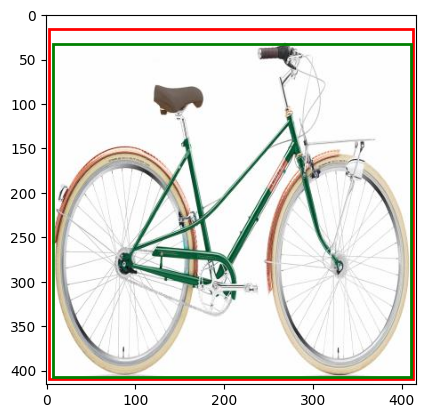




Analizand imaginea:  D:/FACULTATE/SEM4/AI/Lab4/bike_2/bike10.jpg
Ground truth:  [143, 123, 375, 407]
Predictie:  [138, 135, 391, 404]
Error MAE:  9.0
Error aria:  0.5595673334420045


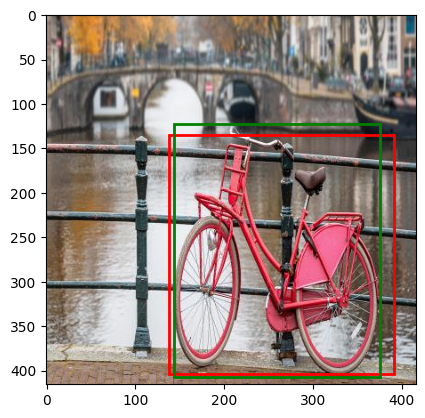




Analizand imaginea:  D:/FACULTATE/SEM4/AI/Lab4/bike_2/binClass.png
Ground truth:  [117, 900, 337, 1033]
Predictie:  [107, 899, 344, 1034]
Error MAE:  4.75
Error aria:  0.0


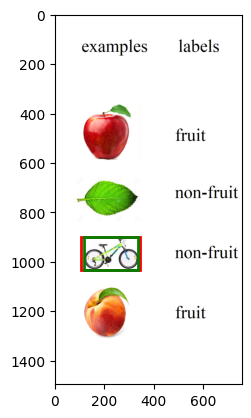




Analizand imaginea:  D:/FACULTATE/SEM4/AI/Lab4/bike_2/bike03.jpg
Ground truth:  [158, 147, 345, 408]
Predictie:  [155, 153, 338, 405]
Error MAE:  4.75
Error aria:  0.9151988378427456
Ground truth:  [63, 144, 197, 392]
Predictie:  [155, 153, 338, 405]
Error MAE:  63.75
Error aria:  1.3345886783570673


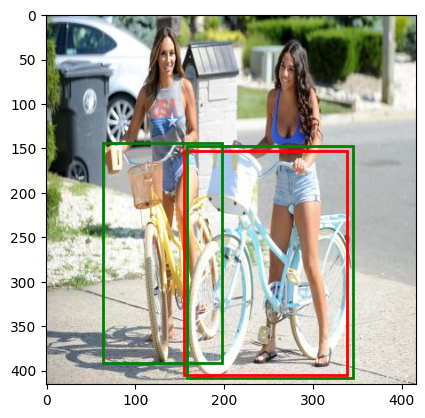




Analizand imaginea:  D:/FACULTATE/SEM4/AI/Lab4/bike_2/bike06.jpg
Ground truth:  [155, 146, 344, 407]
Ground truth:  [64, 144, 194, 393]
Predictie:  [0, 0, 0, 0]
Error MAE:  198.75


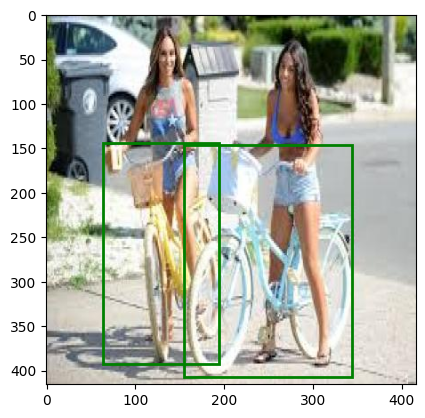

In [166]:
import matplotlib.patches as patches
from collections import defaultdict

def plot_bounding_boxes(csv_file):
    biciclete = defaultdict(list)
    csv_reader = pd.read_csv(csv_file)
    
    for index, row in csv_reader.iterrows():
        # Extrageți informațiile relevante din rândul curent
        bbox_x = int(row["bbox_x"])
        bbox_y = int(row['bbox_y'])
        bbox_width = int(row['bbox_width'])
        bbox_height = int(row['bbox_height'])
        image_name = row['image_name']
        ground_truth = [bbox_x, bbox_y, bbox_width, bbox_height]
        biciclete[image_name].append(ground_truth)

    
    for imagine, pozitii in biciclete.items():
        fig, ax = plt.subplots()
        
        print("Analizand imaginea: ", imagine)
        img = open(imagine, "rb")
        result = computervision_client.analyze_image_in_stream(img, visual_features=[VisualFeatureTypes.objects])
        found_bicycle = False
        for ob in result.objects:      
            if ob.object_property == "bicycle":
                predicted_bicycle_bb = [ob.rectangle.x, ob.rectangle.y, ob.rectangle.x + ob.rectangle.w, ob.rectangle.y + ob.rectangle.h]
                area_predicted = ob.rectangle.w*ob.rectangle.h
                rect_bicycle = patches.Rectangle((predicted_bicycle_bb[0], predicted_bicycle_bb[1]), predicted_bicycle_bb[2]-predicted_bicycle_bb[0], predicted_bicycle_bb[3]-predicted_bicycle_bb[1], linewidth=2, edgecolor='r', facecolor='none')
                ax.add_patch(rect_bicycle)
                found_bicycle = True
          
                img = plt.imread(imagine)
                ax.imshow(img)
            
                # Adăugați caseta delimitatoare pentru biciclete
                for p in pozitii:
                    bbox_x = p[0]
                    bbox_y = p[1]
                    bbox_width = p[2]
                    bbox_height = p[3]
                    area_ground_truth = bbox_height*bbox_width
                    ground_truth = [bbox_x, bbox_y, bbox_x + bbox_width, bbox_y+bbox_height]
                    rect = patches.Rectangle((bbox_x, bbox_y), bbox_width, bbox_height, linewidth=2, edgecolor='g', facecolor='none')
                    ax.add_patch(rect)

                    print("Ground truth: ", ground_truth)
                    print("Predictie: ", predicted_bicycle_bb)

                    err2 = 0
                    # RMSE
                    for v in zip(predicted_bicycle_bb, ground_truth):
                        # MAE
                        err2 = err2 + abs(v[0] - v[1])
                    err2 /= 4
                    print("Error MAE: ", err2)
                    
                    overlap_x = max(0, min(bbox_x1 + bbox_width1, ob.rectangle.x + ob.rectangle.w) - max(bbox_x1, ob.rectangle.x))
                    overlap_y = max(0, min(bbox_y1 + bbox_height1, ob.rectangle.y + ob.rectangle.h) - max(bbox_y1, ob.rectangle.y))
                    overlap_area = overlap_x * overlap_y

                    aria_totala = area_ground_truth+ area_predicted-overlap_area
                    err = overlap_area/aria_totala
                    print("Error aria: ", err)
                    

        if not(found_bicycle):
                img = plt.imread(imagine)
                ax.imshow(img)
                for p in pozitii:
                        bbox_x = p[0]
                        bbox_y = p[1]
                        bbox_width = p[2]
                        bbox_height = p[3]
                        ground_truth = [bbox_x, bbox_y, bbox_x + bbox_width, bbox_y+bbox_height]
                        rect = patches.Rectangle((bbox_x, bbox_y), bbox_width, bbox_height, linewidth=2, edgecolor='g', facecolor='none')
                        ax.add_patch(rect)
                        print("Ground truth: ", ground_truth)
                predicted_bicycle_bb1 = [0,0,0,0]
                print("Predictie: ", predicted_bicycle_bb1)
    
                err2 = 0
                # RMSE
                for v in zip(predicted_bicycle_bb1, ground_truth):
                    # MAE
                    err2 = err2 + abs(v[0] - v[1])
                err2 /= 4
                print("Error MAE: ", err2)
        plt.show()
        print()
        print()
        print()

# Apelați funcția pentru a plota casetele delimitatoare pe imagini
plot_bounding_boxes('D:/FACULTATE/SEM4/AI/Lab4/GroundTruthImagini.csv')

Analizand imaginea:  D:/FACULTATE/SEM4/AI/Lab4/bike_2/bike03.jpg


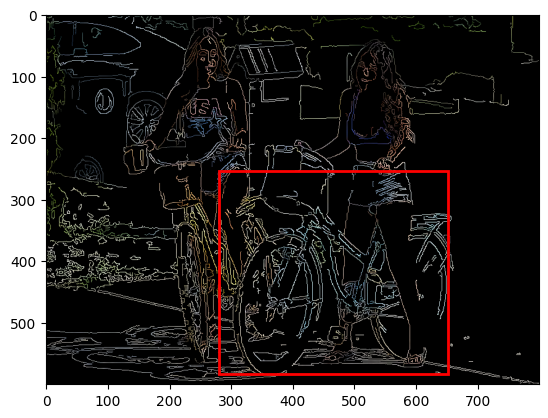




Analizand imaginea:  D:/FACULTATE/SEM4/AI/Lab4/bike_2/bike06.jpg


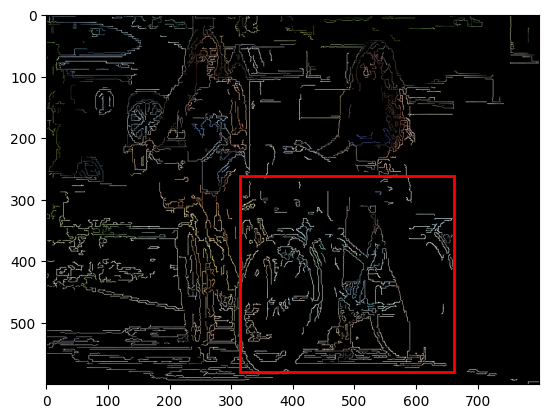

In [190]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from collections import defaultdict
import os

def plot_bounding_boxes(csv_file):
    biciclete = defaultdict(list)
    csv_reader = pd.read_csv(csv_file)
    
    for index, row in csv_reader.iterrows():
        # Extrageți informațiile relevante din rândul curent
        bbox_x = int(row["bbox_x"])
        bbox_y = int(row['bbox_y'])
        bbox_width = int(row['bbox_width'])
        bbox_height = int(row['bbox_height'])
        image_name = row['image_name']
        ground_truth = [bbox_x, bbox_y, bbox_width, bbox_height]
        biciclete[image_name].append(ground_truth)

    
    for imagine, pozitii in biciclete.items():
        print("Analizand imaginea: ", imagine)
        
        # Citirea și redimensionarea imaginii folosind OpenCV
        img = cv2.imread(imagine)
        img_resized = cv2.resize(img, (800, 600))
        
        # Salvarea imaginii redimensionate într-un fișier temporar
        temp_file_path = 'temp_image.jpg'
        cv2.imwrite(temp_file_path, img_resized)
        
        # Aplicarea unui filtru de pronunțare a marginilor
        edges = cv2.Canny(img_resized, 100, 200)
        img_filtered = cv2.bitwise_and(img_resized, img_resized, mask=edges)
        
        # Convertirea imaginii în format RGB
        img_rgb = cv2.cvtColor(img_filtered, cv2.COLOR_BGR2RGB)
        
        # Afișarea imaginii
        fig, ax = plt.subplots()
        ax.imshow(img_rgb)
        
        # Analiza imaginii utilizând serviciul Computer Vision
        with open(temp_file_path, "rb") as image_stream:
            result = computervision_client.analyze_image_in_stream(image_stream, visual_features=['objects'])
            found_bicycle = False
            for ob in result.objects:      
                if ob.object_property == "bicycle":
                    predicted_bicycle_bb = [ob.rectangle.x, ob.rectangle.y, ob.rectangle.x + ob.rectangle.w, ob.rectangle.y + ob.rectangle.h]
                    area_predicted = ob.rectangle.w * ob.rectangle.h
                    rect_bicycle = patches.Rectangle((predicted_bicycle_bb[0], predicted_bicycle_bb[1]), predicted_bicycle_bb[2]-predicted_bicycle_bb[0], predicted_bicycle_bb[3]-predicted_bicycle_bb[1], linewidth=2, edgecolor='r', facecolor='none')
                    ax.add_patch(rect_bicycle)
                    found_bicycle = True

        if not found_bicycle:
            print("Nicio bicicletă detectată.")
            

        
        # Ștergeți fișierul temporar
 
                    
        plt.show()
        print("\n\n")

# Apelați funcția pentru a plota casetele delimitatoare pe imagini
plot_bounding_boxes('D:/FACULTATE/SEM4/AI/Lab4/bici.csv')


Analizand imaginea: D:/FACULTATE/SEM4/AI/Lab4/bike_2/bike03.jpg


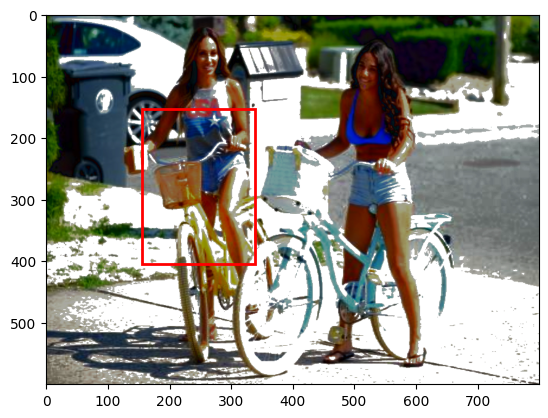




Analizand imaginea: D:/FACULTATE/SEM4/AI/Lab4/bike_2/bike06.jpg
Nicio bicicletă detectată.


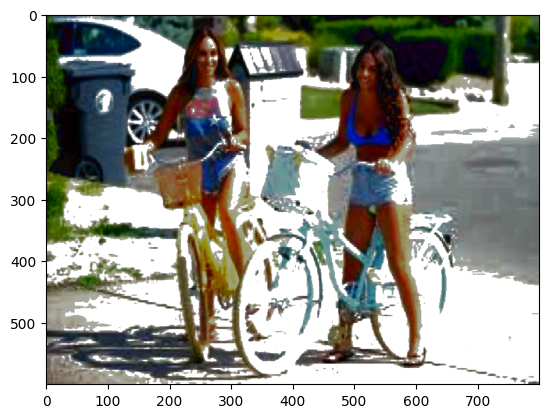

In [208]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from collections import defaultdict
import os
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from azure.cognitiveservices.vision.computervision.models import VisualFeatureTypes
from msrest.authentication import CognitiveServicesCredentials
import pandas as pd

def plot_bounding_boxes(csv_file):
    # Initialize Computer Vision client
    computervision_client = setup()
    
    # Read bounding box data from CSV file
    biciclete = defaultdict(list)
    csv_reader = pd.read_csv(csv_file)
    for index, row in csv_reader.iterrows():
        bbox_x = int(row["bbox_x"])
        bbox_y = int(row['bbox_y'])
        bbox_width = int(row['bbox_width'])
        bbox_height = int(row['bbox_height'])
        image_name = row['image_name']
        ground_truth = [bbox_x, bbox_y, bbox_width, bbox_height]
        biciclete[image_name].append(ground_truth)

    # Process each image
    for imagine, pozitii in biciclete.items():
        print("Analizand imaginea:", imagine)
        
        # Read the original image
        img_original = cv2.imread(imagine)
        
        # Read and preprocess the image
        img = cv2.imread(imagine)
        img_resized = cv2.resize(img, (800, 600))
        
        # Decrease brightness
        img_dark = cv2.convertScaleAbs(img_resized, alpha=1.0, beta=-30)
        
        # Increase contrast
        alpha = 1.5  # Contrast control (1.0-3.0)
        beta = 0    # Brightness control (0-100)
        img_high_contrast = cv2.convertScaleAbs(img_dark, alpha=alpha, beta=beta)
        
        # Apply histogram equalization to accentuate shadows
        img_yuv = cv2.cvtColor(img_high_contrast, cv2.COLOR_BGR2YUV)
        img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
        img_final = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)
        
        # Display the image
        fig, ax = plt.subplots()
        ax.imshow(cv2.cvtColor(img_final, cv2.COLOR_BGR2RGB))
        
        # Analyze the image using Computer Vision
        with open(imagine, "rb") as image_stream:
            result = computervision_client.analyze_image_in_stream(image_stream, visual_features=[VisualFeatureTypes.objects])
            found_bicycle = False
            for ob in result.objects:      
                if ob.object_property == "bicycle":
                    predicted_bicycle_bb = [ob.rectangle.x, ob.rectangle.y, ob.rectangle.x + ob.rectangle.w, ob.rectangle.y + ob.rectangle.h]
                    rect_bicycle = patches.Rectangle((predicted_bicycle_bb[0], predicted_bicycle_bb[1]), predicted_bicycle_bb[2]-predicted_bicycle_bb[0], predicted_bicycle_bb[3]-predicted_bicycle_bb[1], linewidth=2, edgecolor='r', facecolor='none')
                    ax.add_patch(rect_bicycle)
                    found_bicycle = True

        if not found_bicycle:
            print("Nicio bicicletă detectată.")
        
        # Show the plot
        plt.show()
        print("\n\n")

# Apelarea funcției cu calea către fișierul CSV și cheia și endpoint-ul serviciului Computer Vision
plot_bounding_boxes('D:/FACULTATE/SEM4/AI/Lab4/bici.csv')


Analizand imaginea: D:/FACULTATE/SEM4/AI/Lab4/bike_2/bike03.jpg


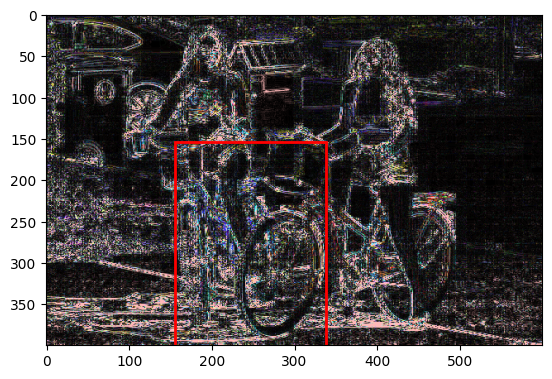




Analizand imaginea: D:/FACULTATE/SEM4/AI/Lab4/bike_2/bike06.jpg
Nicio bicicletă detectată.


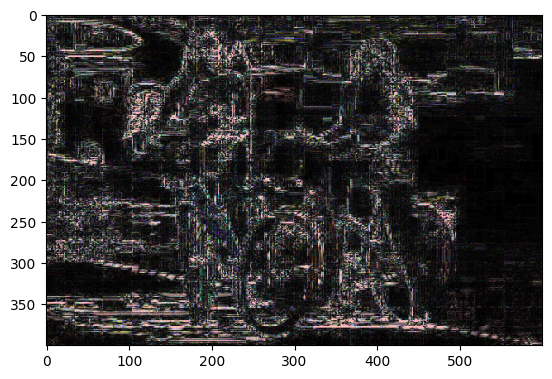

In [32]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from collections import defaultdict
import os
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from azure.cognitiveservices.vision.computervision.models import VisualFeatureTypes
from msrest.authentication import CognitiveServicesCredentials
import pandas as pd

def plot_bounding_boxes(csv_file):
    # Initialize Computer Vision client
    computervision_client = setup()
    
    # Read bounding box data from CSV file
    biciclete = defaultdict(list)
    csv_reader = pd.read_csv(csv_file)
    for index, row in csv_reader.iterrows():
        bbox_x = int(row["bbox_x"])
        bbox_y = int(row['bbox_y'])
        bbox_width = int(row['bbox_width'])
        bbox_height = int(row['bbox_height'])
        image_name = row['image_name']
        ground_truth = [bbox_x, bbox_y, bbox_width, bbox_height]
        biciclete[image_name].append(ground_truth)

    # Process each image
    for imagine, pozitii in biciclete.items():
        print("Analizand imaginea:", imagine)
        
        # Read the original image
        img_original = cv2.imread(imagine)
        
        # Read and preprocess the image
        img = cv2.imread(imagine)
        img_resized = cv2.resize(img, (600, 400))
        
        # Apply Laplacian filter to detect edges
        img_edges = cv2.Laplacian(img_resized, cv2.CV_64F)
        img_edges = cv2.convertScaleAbs(img_edges)
        
        # Increase contrast to enhance edges
        alpha = 5
        beta = 0
        img_high_contrast = cv2.convertScaleAbs(img_edges, alpha=alpha, beta=beta)
        
        # Increase saturation
        img_hsv = cv2.cvtColor(img_high_contrast, cv2.COLOR_BGR2HSV)
        img_hsv[:,:,1] += 70
        img_final = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2BGR)
        
        # Display the image
        fig, ax = plt.subplots()
        ax.imshow(cv2.cvtColor(img_final, cv2.COLOR_BGR2RGB))
        
        # Analyze the image using Computer Vision
        with open(imagine, "rb") as image_stream:
            result = computervision_client.analyze_image_in_stream(image_stream, visual_features=[VisualFeatureTypes.objects])
            found_bicycle = False
            for ob in result.objects:      
                if ob.object_property == "bicycle":
                    predicted_bicycle_bb = [ob.rectangle.x, ob.rectangle.y, ob.rectangle.x + ob.rectangle.w, ob.rectangle.y + ob.rectangle.h]
                    rect_bicycle = patches.Rectangle((predicted_bicycle_bb[0], predicted_bicycle_bb[1]), predicted_bicycle_bb[2]-predicted_bicycle_bb[0], predicted_bicycle_bb[3]-predicted_bicycle_bb[1], linewidth=2, edgecolor='r', facecolor='none')
                    ax.add_patch(rect_bicycle)
                    found_bicycle = True

        if not found_bicycle:
            print("Nicio bicicletă detectată.")
        
        # Show the plot
        plt.show()
        print("\n\n")

# Apelarea funcției cu calea către fișierul CSV și cheia și endpoint-ul serviciului Computer Vision
plot_bounding_boxes('D:/FACULTATE/SEM4/AI/Lab4/bici.csv')
